# Benchmarking

modOpt enables seamless benchmarking of existing or new optimizers
by providing an interface with the large collection of problems
from the CUTEst test-suite.
There are several additional problems in [Examples](./examples.md) that can
also be used for benchmarking or as references for developing new 
benchmarking sets within modOpt.
modOpt also provides utilities for generating performance profiles
to compare different optimizers.

## CUTEst test problems

```{toctree}
:maxdepth: 1
:hidden:

benchmarking/cutest_problem_table
```

To use CUTEst problems, first install 
[pyCUTEst](https://github.com/jfowkes/pycutest/tree/master).
Any CUTEst problem could then be interfaced with modOpt
through the `CUTEstProblem` class.
See [CUTEst problem table](./benchmarking/cutest_problem_table.md) for
the complete list of CUTEst problems.

The following code shows how to import the CUTEst problem named ‘ROSENBR’ 
and solve it using modOpt.

In [1]:
import pycutest

# Import the ROSENBR problem from the CUTEst library
cutest_problem = pycutest.import_problem('ROSENBR')

import modopt as mo

# Wrap the PyCUTEst problem with modOpt's CUTEstProblem class
problem   = mo.CUTEstProblem(cutest_problem=cutest_problem)

# Solve the problem using the SLSQP optimizer and print the results
optimizer = mo.SLSQP(problem, solver_options={'maxiter':100})
optimizer.solve()
optimizer.print_results()


	Solution from Scipy SLSQP:
	----------------------------------------------------------------------------------------------------
	Problem                  : ROSENBR
	Solver                   : scipy-slsqp
	Success                  : True
	Message                  : Optimization terminated successfully
	Status                   : 0
	Total time               : 0.005422830581665039
	Objective                : 1.122380278753566e-08
	Gradient norm            : 0.0033425664297680427
	Total function evals     : 47
	Total gradient evals     : 34
	Major iterations         : 34
	Total callbacks          : 81
	Reused callbacks         : 0
	obj callbacks            : 47
	grad callbacks           : 34
	hess callbacks           : 0
	con callbacks            : 0
	jac callbacks            : 0
	----------------------------------------------------------------------------------------------------


## Performance profiling

We saw above how to import and solve a problem from the CUTEst collection.
When benchmarking multiple optimizers, we run them on several problems and
compare their performances.
Performance profiles are one of the most frequently utilized and 
broadly recognized methods for evaluating and comparing two or more optimization algorithms.

The following code shows how to:
1. filter a subset of problems from CUTEst based on the number of variables and constraints,
2. import and wrap them using modOpt's `CUTEstProblem` class,
3. solve them using the `SLSQP` and `TrustConstr` optimizers, and
4. plot the performance profiles of the two optimizers based on the
   results of these problems.

/Users/venv/lib/python3.9/site-packages/scipy/optimize/_trustregion_constr/equality_constrained_sqp.py:80: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  Z, LS, Y = projections(A, factorization_method)
/Users/venv/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Total number of problems: 161 

Solver: SLSQP
--------------------------------------------------
Number of problems solved: 147
Percentage of problems solved: 91.30434782608695
-------------------------------------------------- 

Solver: TrustConstr
--------------------------------------------------
Number of problems solved: 128
Percentage of problems solved: 78.88198757763976
-------------------------------------------------- 



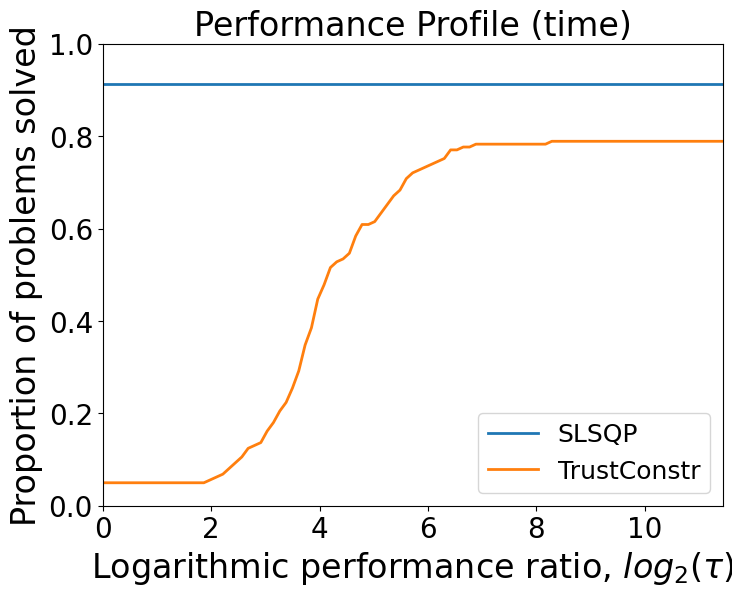

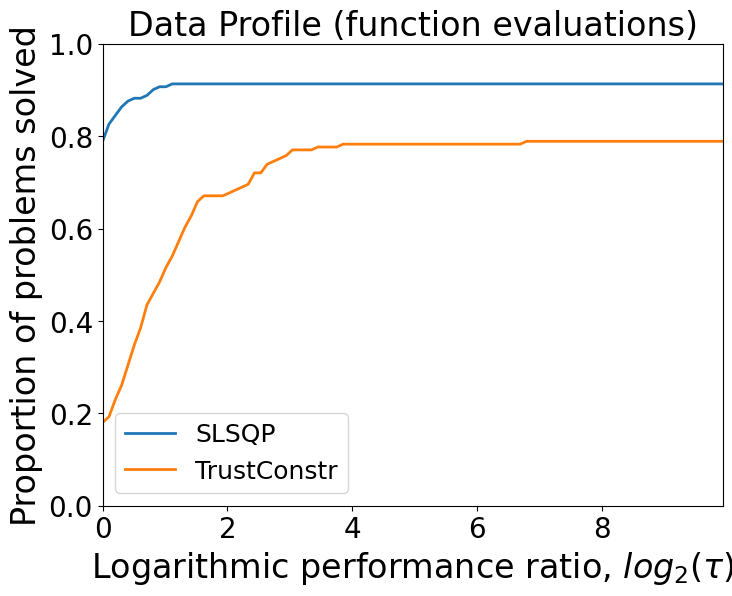

In [2]:
from modopt.benchmarking import filter_cutest_problems

# Filter CUTEst problems to only include those with 1-5 variables and 0-1 constraints
problems = filter_cutest_problems(num_vars=[1,5], num_cons=[0,1])

performance = {}
# Import and solve all the filtered problems using the SLSQP and TrustConstr optimizers
for i, prob_name in enumerate(problems):
    # print(f'[{i+1}.] Solving {prob_name}')
    cutest_problem = pycutest.import_problem(prob_name)
    problem  = mo.CUTEstProblem(cutest_problem=cutest_problem)

    optimizer = mo.SLSQP(problem, solver_options={'maxiter':100})
    results = optimizer.solve()

    performance[prob_name, 'SLSQP'] = {'time': optimizer.total_time, 
                                       'success': results['success'],
                                       'nev': results['total_callbacks']}
    
    optimizer = mo.TrustConstr(problem, solver_options={'maxiter':100})
    results = optimizer.solve()

    performance[prob_name, 'TrustConstr'] = {'time': optimizer.total_time,
                                             'success': results['success'],
                                             'nev': results['total_callbacks']}
    
# Generate the performance profiles
%matplotlib inline
from modopt.benchmarking import plot_performance_profiles
plot_performance_profiles(performance, save_figname='performance.pdf')

For more details on the `CUTEstProblem` class or any of the `benchmarking` utilities, 
visit the [API Reference](./api.md) page.